In [13]:
import matplotlib.pyplot as plt  
import pandas as pd  
from joblib import dump  
from lightgbm import LGBMClassifier  # model algorithm
from sklearn.metrics import ConfusionMatrixDisplay  
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split  

In [14]:
df = pd.read_csv("../../SocialNetworkAds.csv")

In [15]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [18]:
lgbc = LGBMClassifier(max_depth=5, force_col_wise=True)
lgbc.fit(X_train, y_train)
y_pred = lgbc.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 135, number of negative: 225
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375000 -> initscore=-0.510826
[LightGBM] [Info] Start training from score -0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [19]:
lgbc_con_matrix = confusion_matrix(y_test, y_pred)
lgbc_acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix", "\n", lgbc_con_matrix, "\n")
print("Accuracy of Light Gradient Boosting Classification :", lgbc_acc * 100, "\n")
print("Classification Report", "\n", classification_report(y_test, y_pred))

Confusion Matrix 
 [[30  2]
 [ 1  7]] 

Accuracy of Light Gradient Boosting Classification : 92.5 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.78      0.88      0.82         8

    accuracy                           0.93        40
   macro avg       0.87      0.91      0.89        40
weighted avg       0.93      0.93      0.93        40



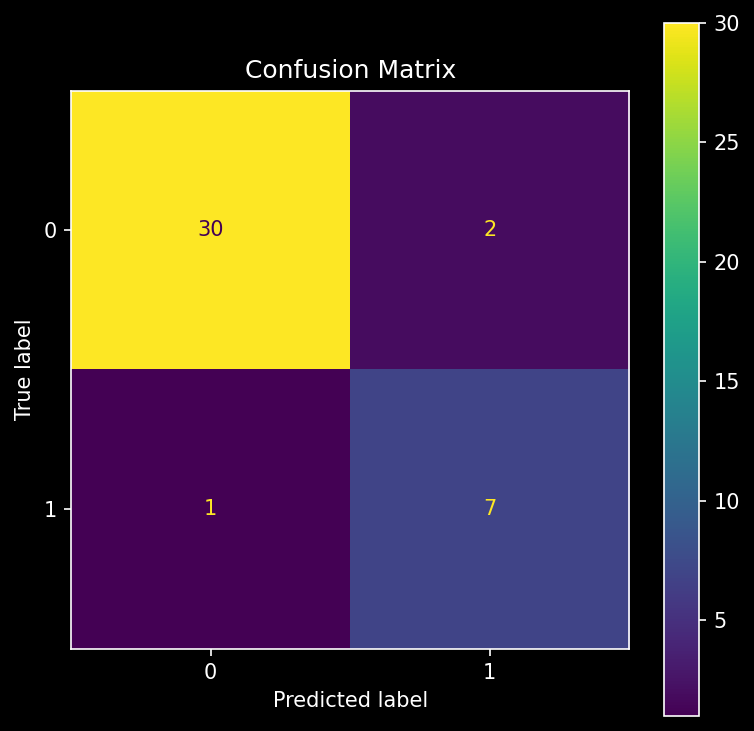

In [20]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
ConfusionMatrixDisplay(lgbc_con_matrix).plot(ax=ax)
plt.title("Confusion Matrix")
plt.savefig(
    "Images/Confusion_Matrix_Light_Gradient_Boosting_Classification.png",
    bbox_inches="tight",
)

In [21]:
y_score = lgbc.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


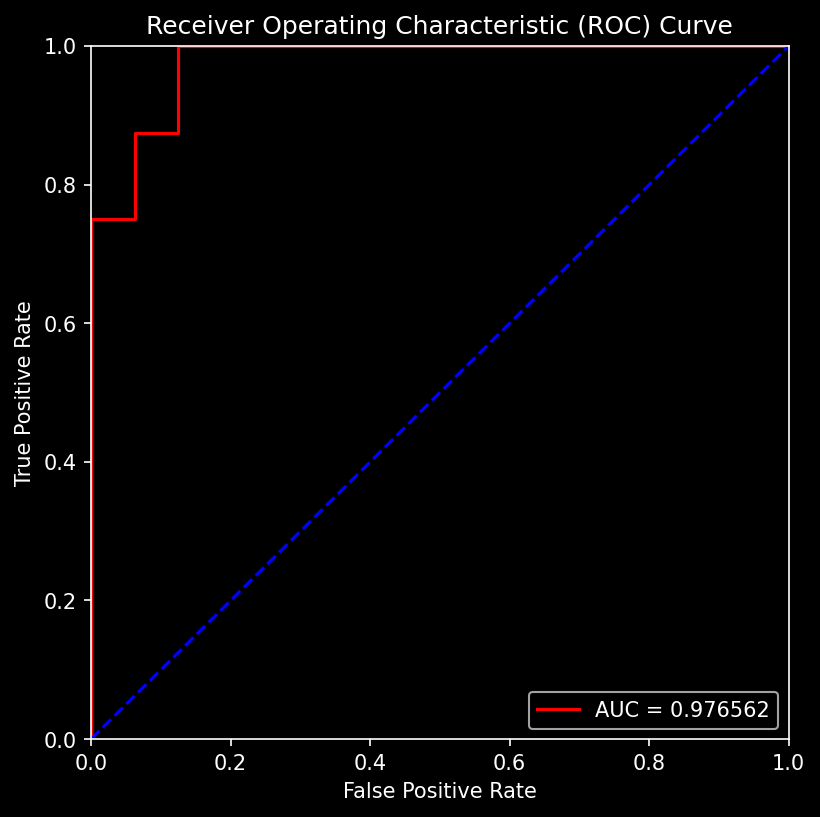

In [22]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
plt.plot(false_positive_rate, true_positive_rate, "r", label="AUC = %f" % roc_auc)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "b--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.savefig(
    "Images/ROC_Curve_Light_Gradient_Boosting_Classification.png", bbox_inches="tight"
)

In [23]:
print(
    "Area Under the Receiver Operating Characteristic Curve :",
    roc_auc_score(y_test, y_score),
)

Area Under the Receiver Operating Characteristic Curve : 0.9765625


In [24]:
dump(lgbc, "lightGradientBoostingClassifier.joblib")

['lightGradientBoostingClassifier.joblib']